<a href="https://www.kaggle.com/code/sufyanmun/car-price-prediction?scriptVersionId=114254147" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Importing the libaries & dependencies 

In [1]:
# Importing the libaries & dependencies 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics 

In [2]:
# Adding the data (Data Collection & Processing)
car_dataset = pd.read_csv('/kaggle/input/vehicle-dataset-from-cardekho/car data.csv')


# Data Exploration 

In [3]:
# Checking the first 5 rows of the dataset
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
# Viewing the number of rows & columns
car_dataset.shape

(301, 9)

In [5]:
# Retrieving more info about the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
# Check to see if we have missing values (Null values)
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
# Seeing the distribution of categorical data 
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


# **Encoding the categorical data**

In [8]:
 # Encoding the categorical data for fuel type column
car_dataset.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2, }},inplace=True)

 # Encoding the categorical data for seller type column
car_dataset.replace({'Seller_Type':{'Dealer':0, 'Individual':1}},inplace=True)

 # Encoding the categorical data for transmission column
car_dataset.replace({'Transmission':{'Manual':0, 'Automatic':1}},inplace=True)

In [9]:
# Checking if the encoding was done correctly 
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


# Splitting the data into training data & test data

In [10]:
# Splitting the data into X & Y (Independant & dependant variable)
X = car_dataset.drop(['Car_Name','Selling_Price'], axis=1)
Y = car_dataset['Selling_Price']

In [11]:
# Viewing the split data (independant & dependant variables)
X.head()

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0


In [12]:
# We can use either head or print to view the data
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [13]:
# Splitting the data intro training and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.05)


# 1. Linear Regression Model

In [14]:
# Loading the Linear Regression Model 
lin_reg_model = LinearRegression()

In [15]:
#  Fitting our data into the Linear Regression Model (Training our model)
lin_reg_model.fit(X_train, Y_train)

LinearRegression()

In [16]:
# Predicitions on training data
training_data_prediction = lin_reg_model.predict(X_train)

In [17]:
# Testing the accuracy of our model (R Squared Error)
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R Scored Error: ", error_score)

R Scored Error:  0.8805741925431814


# Visualizing the actual price & predicited prices of the training data

<function matplotlib.pyplot.show(close=None, block=None)>

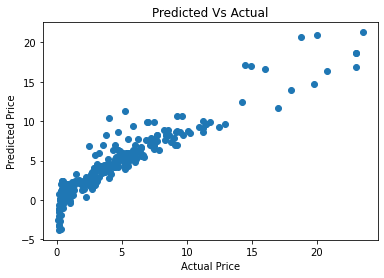

In [18]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Predicted Vs Actual")
plt.show

# Using the Linear Regression Model on the test data

In [19]:
# Prediction on Test Data
test_data_prediction = lin_reg_model.predict(X_test)

In [20]:
# R Squared Error of predictions on Test Data
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R Scored Error: ", error_score)

R Scored Error:  0.8255646890438186


<function matplotlib.pyplot.show(close=None, block=None)>

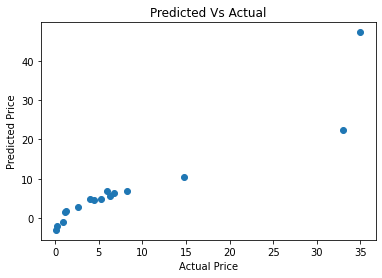

In [21]:
# Plotting the test data predictions vs actual 
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Predicted Vs Actual")
plt.show